# 2020-07-27 • Synaptic conductances

This notebook builds on the `2020-07-06 Single neuron sim` notebook.

There, we used an ad-hoc solution to stimulate the simulated neuron
(namely, directly give I as input, where I is a spike train convolved with a manually
defined EPSC).

Here, we use proper synaptic conductances.


In [1]:
%run init.ipynb

Importing np, mpl, plt … ✔
Importing unyt … ✔
Importing code package (voltage_to_wiring_sim), as `v` … ✔
Imported * from v.units

To see the source code responsible for this notebook:

- Go to
  https://github.com/tfiers/voltage-to-wiring-sim/tree/master/notebooks

- In the file listing, click the commit message 
  next to this notebook's name

- Click the "Browse files" button.

This shows the entire repository as it was 
when this notebook was last modified.


Running simulation, without stripping units … ✔ (1.2 s)
Stripping units + running simulation … ✔ (1.4 s)


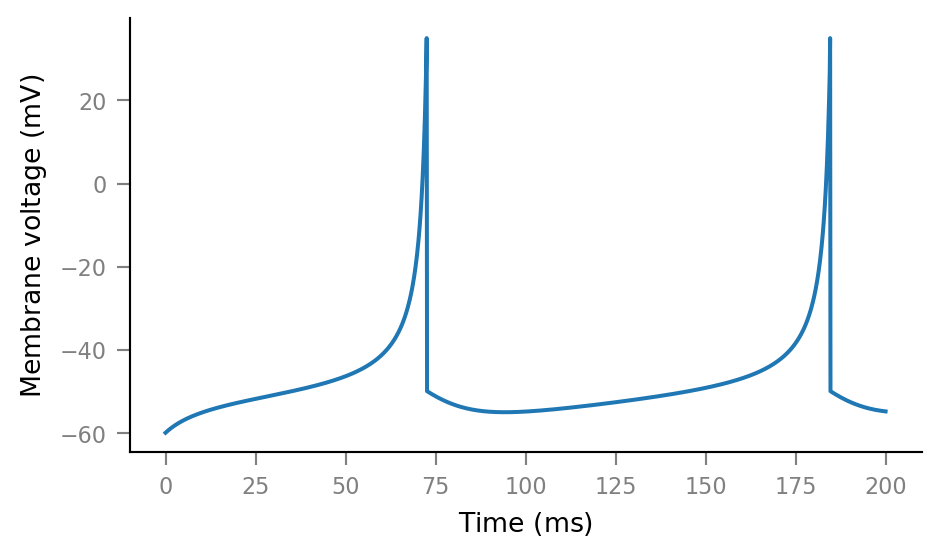

In [2]:
v.neuron_sim.test()

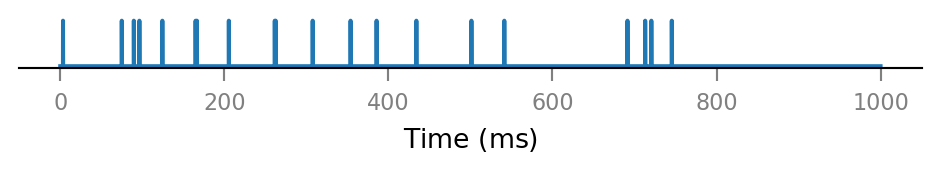

In [3]:
v.presynaptic_spike_train.show()

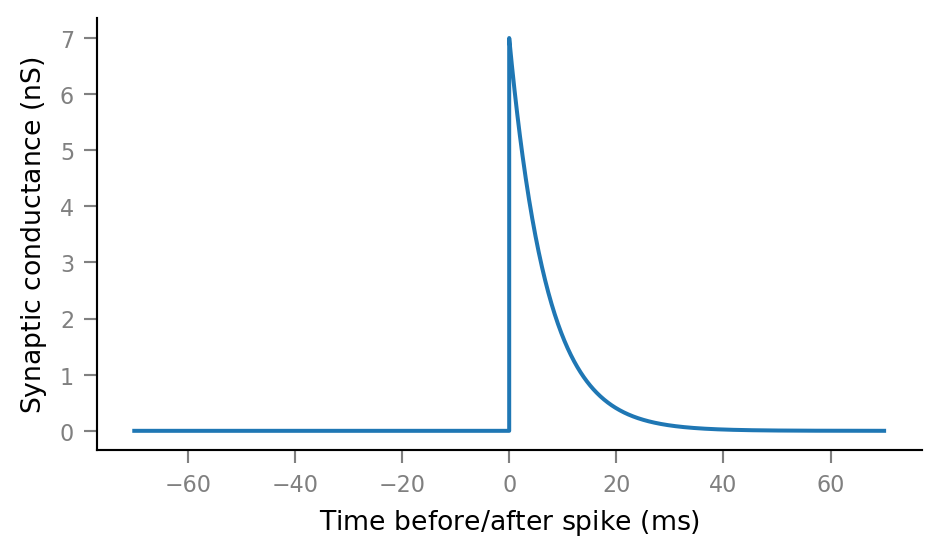

In [4]:
g_syn_tau = 7 * ms
g_syn_max = 7 * nS

time_grid = v.short_time_grid
T_support = 10 * g_syn_tau
N_support = round(T_support / time_grid.dt)
t_support = np.linspace(0, T_support, N_support)

g_syn = unyt_array(
    np.concatenate([np.zeros(N_support), np.exp(-t_support / g_syn_tau) * g_syn_max]),
    nS,
    name="Synaptic conductance",
)

t_plot = unyt_array(
    np.concatenate([-t_support[::-1], t_support]), ms, name="Time before/after spike"
    
)
plt.plot(t_plot, g_syn);

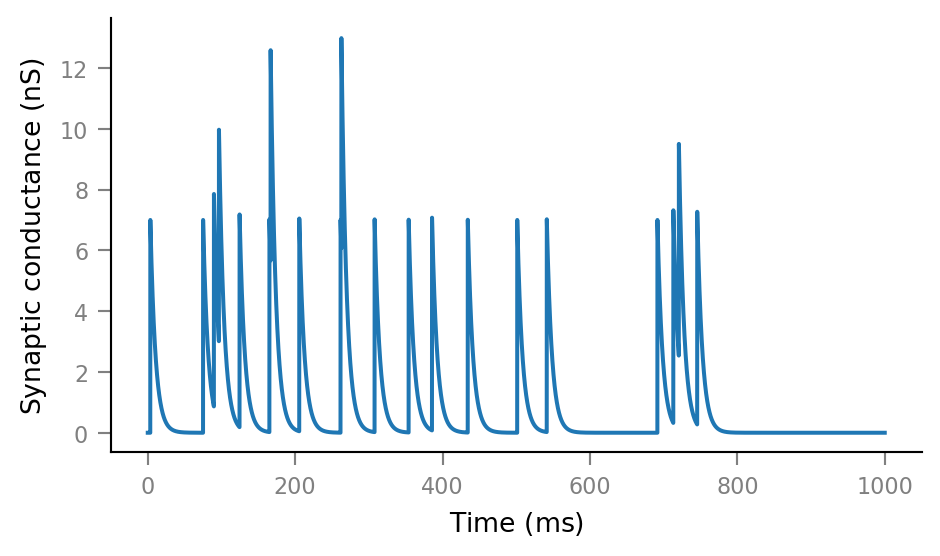

In [5]:
g_syn_total = unyt_array(
    np.convolve(v.presynaptic_spike_train.all_spikes, g_syn, mode="same"),
    nS,
    name="Synaptic conductance",
)
plt.plot(time_grid.t, g_syn_total);

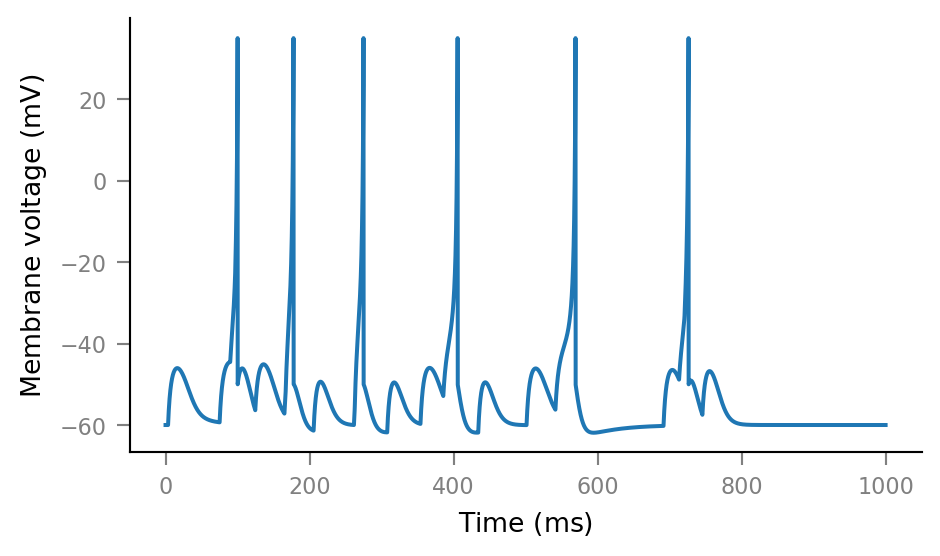

In [6]:
sim = v.neuron_sim.simulate_izh_neuron(
    v.short_time_grid, v.neuron_params.cortical_RS, g_syn_total)

plt.plot(time_grid.t, sim.V_m);

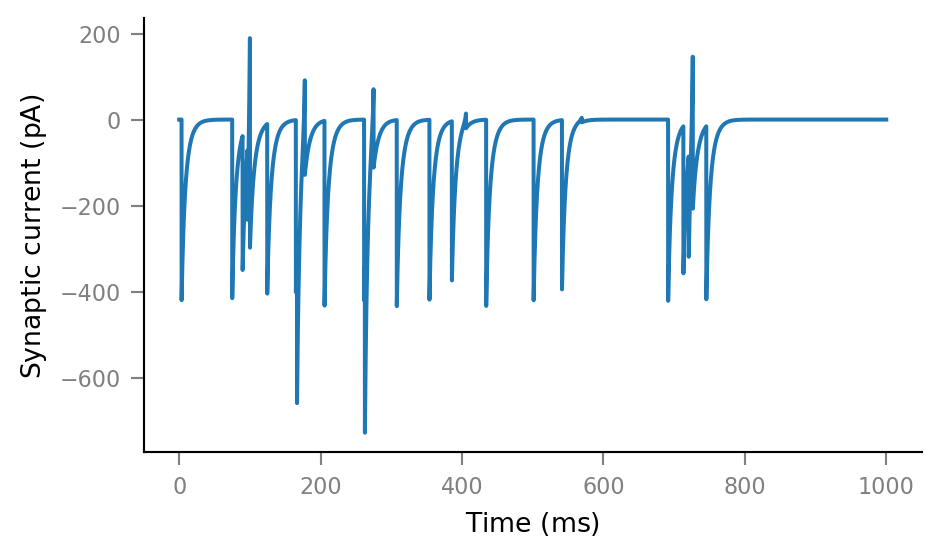

In [7]:
plt.plot(time_grid.t, sim.I_syn);

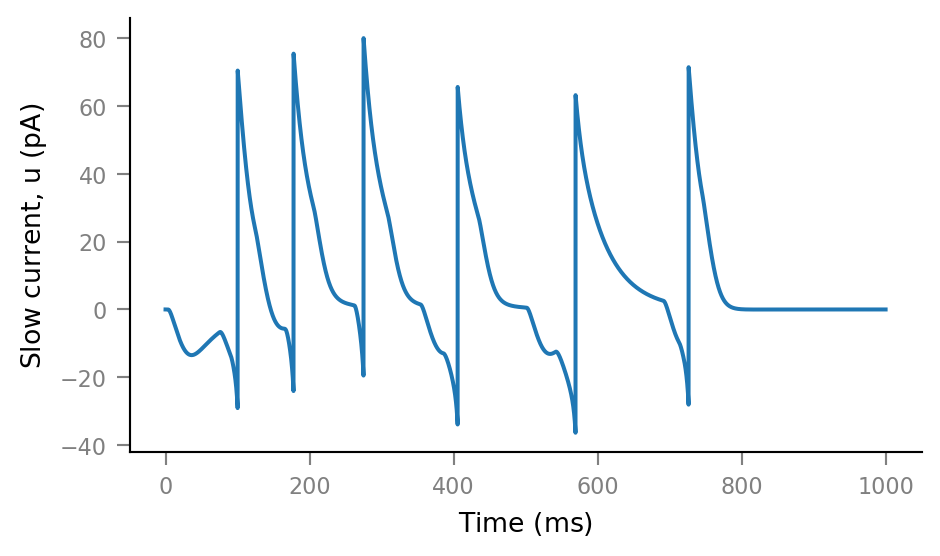

In [8]:
plt.plot(time_grid.t, sim.u);